In [29]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

## Plot functions

In [30]:
def time_by_pcap(df):
    boxplot = sns.boxplot(x='pcap_file', y='time', data=df)
    boxplot.set_xlabel('');
    boxplot.set_ylabel('Time (s)');
    boxplot.set_title('Time spent for generating answers by pcap file');

In [31]:
def time_by_exp(df):
    boxplot = sns.boxplot(data=df, x='exp', y='time', width=0.3)
    boxplot.set_xlabel('');
    boxplot.set_ylabel('Time (s)');
    boxplot.set_title('Time spent for generating answers by experiment');

In [32]:
def correct_answers_by_pcap(df):
    q_status = df.groupby(['exp','pcap_file','status']).count().rename(columns={'time': 'count'}).reset_index()
    barplot = sns.catplot(data=q_status, kind='bar', x='pcap_file', y='count', hue='status')
    barplot.set_axis_labels('Pcap files','Count');
    barplot.legend.set_title('Status');
    barplot.fig.suptitle('Number of correct and wrong answers by pcap file', y=1.05);
    for ax in barplot.axes.flat:
        for i in range(len(ax.containers)):
            ax.bar_label(ax.containers[i])

In [33]:
def correct_answers_by_exp(df):
    q_status_all = df.groupby(['status']).count().rename(columns={'time': 'count'})['count'].reset_index()
    barplot = sns.barplot(data=q_status_all, x='status', y='count', width=0.3)
    barplot.set_xlabel('');
    barplot.set_ylabel('Count');
    barplot.set_title('Number of correct and wrong answers by experiment', y=1.05);
    for container in barplot.containers:
        barplot.bar_label(container)

In [34]:
def get_stats(exp, df, idx):
    try:
        q = df[df['status'] == 'Wrong output']
        row = q.iloc[idx]
        print(f"Original query: {exp[row['pcap_file']][row['list_idx']]['group_query']}")
        print(f"Modified query: {exp[row['pcap_file']][row['list_idx']]['modified_query']}")
        print(f"Original MySQL query:")
        for line in row['original_query'].split('\n'):
            print(f"\t{line}")
        print(f"GPT MySQL query:")
        for line in exp[row['pcap_file']][row['list_idx']]['gpt_query'].split('\n'):
            print(f"\t{line}")
        print("Ground truth output")
        print(tabulate(exp[row['pcap_file']][row['list_idx']]['gt_output'], headers='keys', tablefmt='psql'))
        print("Approach output")
        print(tabulate(exp[row['pcap_file']][row['list_idx']]['approach_output'], headers='keys', tablefmt='psql'))
    except:
        raise Exception(f"There are only {len(df[df['status'] == 'Wrong output'])} wrong outputs")

## Experiment 1

In [35]:
# Load ./experiment/exp1.pkl
with open('./experiment/exp1.pkl', 'rb') as f:
    exp1 = pickle.load(f)

In [36]:
# exp1['part1.pcap']

In [37]:
df1 = pd.DataFrame(columns=['exp', 'pcap_file', 'group_id', 'group_query',
                   'original_query', 'gpt_query', 'time', 'status'])

for pcap_file, exp in exp1.items():
    for i, result in enumerate(exp):
        pred = "Correct output" if result['status'] else "Wrong output"
        original_query = open(f"mysql_queries/q{result['group_id']+1}.sql", mode='r', encoding='utf-8-sig').read()
        row = ['exp1', pcap_file, result['group_id'], result['group_query'],
               original_query, result['gpt_query'], result['time'], pred]
        df1.loc[len(df1)] = row


In [38]:
df1

,exp,pcap_file,group_id,group_query,original_query,gpt_query,time,status
0,exp1,part1.pcap,0,What is the IP address that has sent the most ...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,2.762931,Correct output
1,exp1,part1.pcap,1,What is the IP address that has sent the most ...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, SUM(le...",SELECT src_ip FROM packets GROUP BY src_ip ORD...,2.456817,Correct output
2,exp1,part1.pcap,2,What are the IPs that have shared the most num...,"SELECT src_ip, dst_ip\nFROM (\n\tSELECT src_ip...","SELECT src_ip, dst_ip, COUNT(*) AS packet_coun...",11.545490,Correct output
3,exp1,part1.pcap,3,What are the IPs that have shared most data?,"SELECT src_ip, dst_ip\nFROM (\n\tSELECT src_ip...","SELECT src_ip, dst_ip, SUM(length) AS total_da...",15.568291,Correct output
4,exp1,part1.pcap,4,How many handshakes are there?,SELECT SUM(c) as c\nFROM (\n\tSELECT COUNT(*) ...,SELECT COUNT(*) FROM packets WHERE handshake !...,4.587312,Correct output
5,exp1,part1.pcap,5,What is the most used protocol?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count \nFROM pack...",5.835829,Correct output
6,exp1,home1.pcap,0,What is the IP address that has sent the most ...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,5.531248,Correct output
7,exp1,home1.pcap,1,What is the IP address that has sent the most ...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, SUM(le...",SELECT src_ip FROM packets GROUP BY src_ip ORD...,3.320482,Correct output
8,exp1,home1.pcap,2,What are the IPs that have shared the most num...,"SELECT src_ip, dst_ip\nFROM (\n\tSELECT src_ip...","SELECT src_ip, dst_ip, COUNT(*) AS packet_coun...",4.366989,Correct output
9,exp1,home1.pcap,3,What are the IPs that have shared most data?,"SELECT src_ip, dst_ip\nFROM (\n\tSELECT src_ip...","SELECT src_ip, dst_ip, SUM(length) AS total_da...",6.837350,Correct output


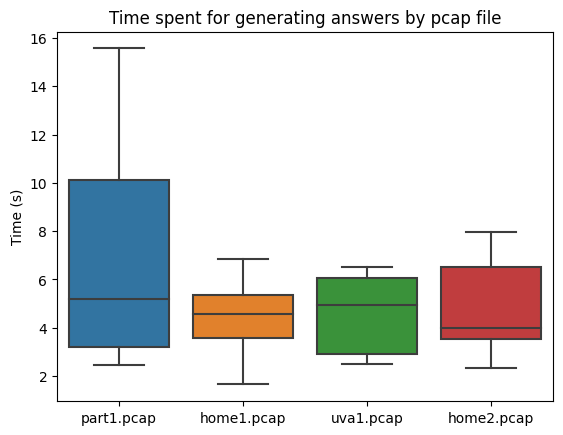

In [39]:
time_by_pcap(df1)

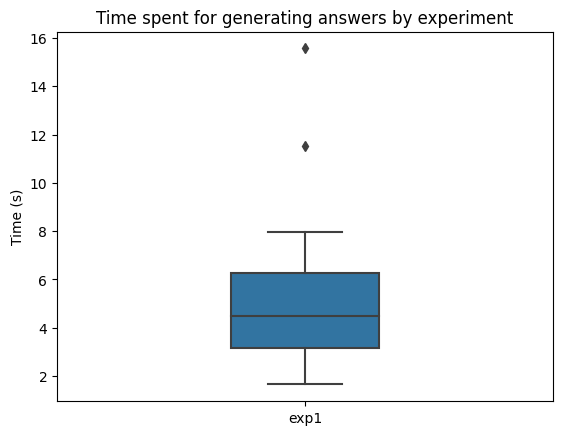

In [40]:
time_by_exp(df1)

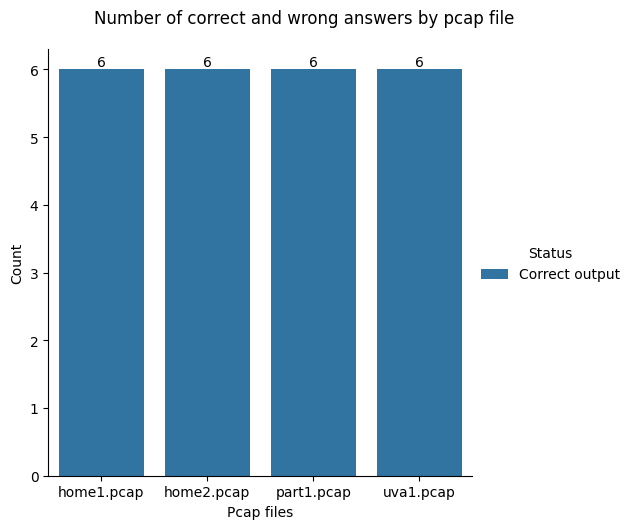

In [41]:
correct_answers_by_pcap(df1)

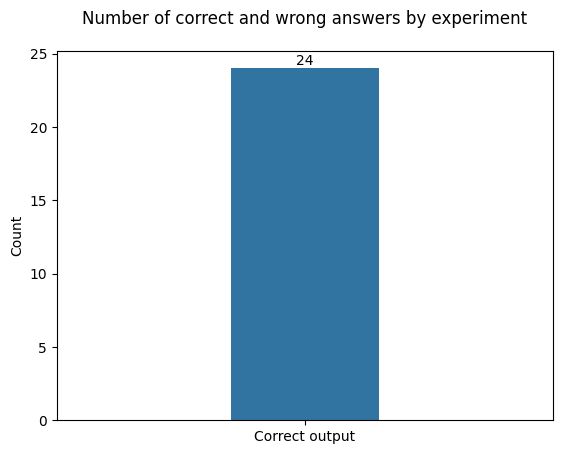

In [42]:
correct_answers_by_exp(df1)

## Experiment 2

In [43]:
# Load ./experiment/exp2.pkl
with open('./experiment/exp2.pkl', 'rb') as f:
    exp2 = pickle.load(f)

In [44]:
# exp2['home1.pcap']

In [45]:
df2 = pd.DataFrame(columns=['exp', 'pcap_file', 'list_idx', 'group_id', 'group_query',
                   'modified_query', 'original_query', 'gpt_query', 'time', 'status'])

for pcap_file, exp in exp2.items():
    for i, result in enumerate(exp):
        pred = "Correct output" if result['status'] else "Wrong output"
        original_query =  open(f"mysql_queries/q{result['group_id']+1}.sql", mode='r', encoding='utf-8-sig').read()
        row = [
            'exp2', pcap_file, i,
            result['group_id'],
            result['group_query'],
            result['modified_query'],
            original_query,
            result['gpt_query'],
            result['time'],
            pred]
        df2.loc[len(df2)] = row


In [46]:
df2

,exp,pcap_file,list_idx,group_id,group_query,modified_query,original_query,gpt_query,time,status
0,exp2,part1.pcap,0,0,What is the IP address that has sent the most ...,Which IP address sent the largest number of TC...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,17.855700,Correct output
1,exp2,part1.pcap,1,0,What is the IP address that has sent the most ...,"Out of all the IP addresses, which one sent th...","SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,2.687632,Correct output
2,exp2,part1.pcap,2,0,What is the IP address that has sent the most ...,"Of all the TCP packets sent, which IP address ...","SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,2.623585,Correct output
3,exp2,part1.pcap,3,1,What is the IP address that has sent the most ...,Which IP address sent the most data?,"SELECT src_ip\nFROM (\n\tSELECT src_ip, SUM(le...",SELECT src_ip FROM packets GROUP BY src_ip ORD...,3.643037,Correct output
4,exp2,part1.pcap,4,1,What is the IP address that has sent the most ...,"Of all the data sent, which of the IP addresse...","SELECT src_ip\nFROM (\n\tSELECT src_ip, SUM(le...","SELECT src_ip, COUNT(*) AS count\nFROM packets...",3.045446,Wrong output
...,...,...,...,...,...,...,...,...,...,...
67,exp2,home2.pcap,13,4,How many handshakes are there?,"Between all IPs, how many handshakes were ther...",SELECT SUM(c) as c\nFROM (\n\tSELECT COUNT(*) ...,SELECT COUNT(*) FROM packets WHERE handshake !...,2.768273,Correct output
68,exp2,home2.pcap,14,4,How many handshakes are there?,Tell me exactly how many handshakes were perfo...,SELECT SUM(c) as c\nFROM (\n\tSELECT COUNT(*) ...,SELECT COUNT(*) FROM packets WHERE handshake !...,1.711428,Correct output
69,exp2,home2.pcap,15,5,What is the most used protocol?,Which protocol was used the most?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count FROM packet...",2.430477,Correct output
70,exp2,home2.pcap,16,5,What is the most used protocol?,"Of all protocols, which one was used the most?","SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count \nFROM pack...",3.678588,Correct output


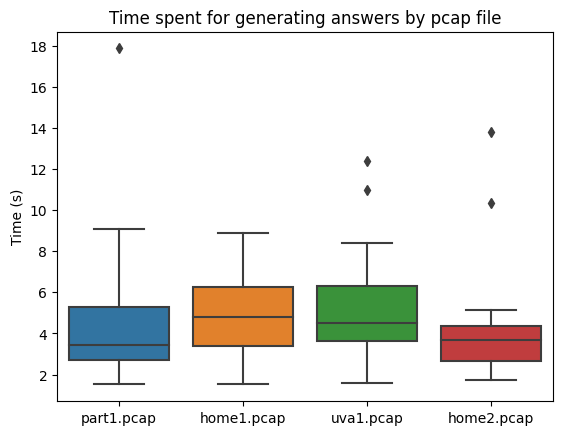

In [47]:
time_by_pcap(df2)

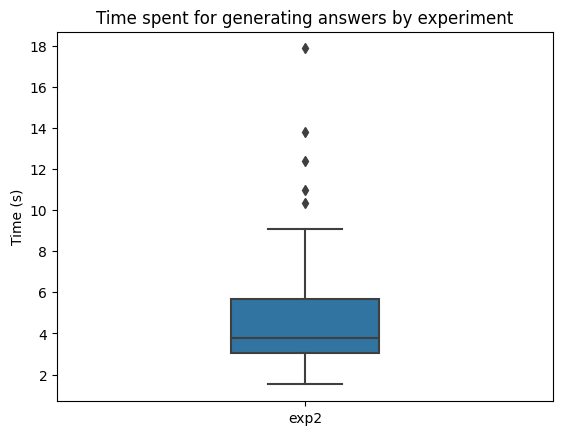

In [48]:
time_by_exp(df2)

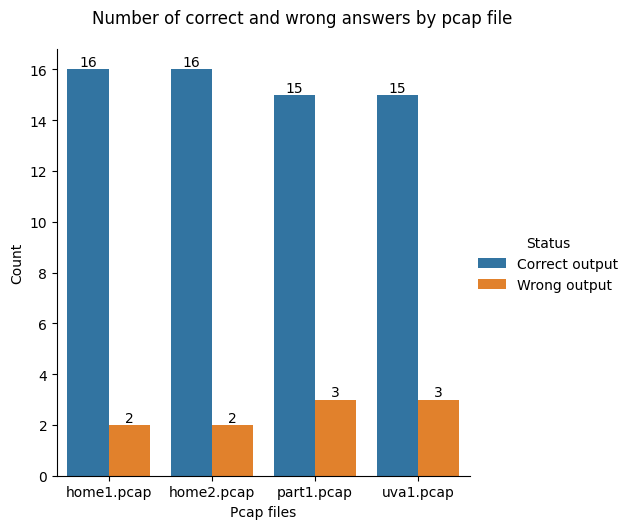

In [49]:
correct_answers_by_pcap(df2)

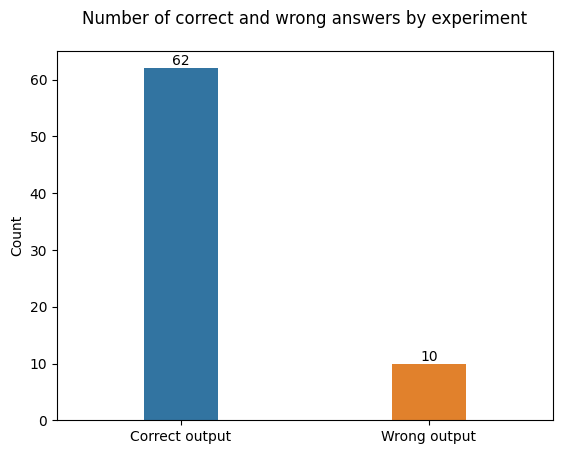

In [50]:
correct_answers_by_exp(df2)

In [51]:
get_stats(exp2, df2, 0)

Original query: What is the IP address that has sent the most data?
Modified query: Of all the data sent, which of the IP addresses sent the majority?
Original MySQL query:
	SELECT src_ip
	FROM (
		SELECT src_ip, SUM(length) as data_length
		FROM pcap_data.packets
		GROUP BY src_ip
		ORDER BY data_length DESC
	) aux
	LIMIT 1
GPT MySQL query:
	SELECT src_ip, COUNT(*) AS count
	FROM packets
	GROUP BY src_ip
	ORDER BY count DESC
	LIMIT 1;
Ground truth output
+----+---------------+
|    | src_ip        |
|----+---------------|
|  0 | 128.143.67.11 |
+----+---------------+
Approach output
+----+--------------+---------+
|    | src_ip       |   count |
|----+--------------+---------|
|  0 | 192.168.1.15 |      32 |
+----+--------------+---------+


## Experiment 3

In [52]:
# Load ./experiment/exp3.pkl
with open('./experiment/exp3.pkl', 'rb') as f:
    exp3 = pickle.load(f)

In [107]:
df3 = pd.DataFrame(columns=['exp', 'pcap_file', 'list_idx', 'group_id', 'group_query',
                   'modified_query', 'original_query', 'gpt_query', 'time', 'status', 'language'])

languages = ['spanish', 'french', 'mandarin', 'italian', 'portuguese']
for pcap_file, exp in exp3.items():
    for i, result in enumerate(exp):
        pred = "Correct output" if result['status'] else "Wrong output"
        original_query =  open(f"mysql_queries/q{result['group_id']+1}.sql", mode='r', encoding='utf-8-sig').read()

        row = [
            'exp3', pcap_file, i,
            result['group_id'],
            result['group_query'],
            result['modified_query'],
            original_query,
            result['gpt_query'],
            result['time'],
            pred, languages[i % 5]]
        df3.loc[len(df3)] = row


In [108]:
df3

,exp,pcap_file,list_idx,group_id,group_query,modified_query,original_query,gpt_query,time,status,language
0,exp3,part1.pcap,0,0,What is the IP address that has sent the most ...,¿Cuál es la dirección IP que ha enviado la may...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,5.119030,Correct output,spanish
1,exp3,part1.pcap,1,0,What is the IP address that has sent the most ...,Quelle est l'adresse IP qui a envoyé le plus d...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,2.085411,Correct output,french
2,exp3,part1.pcap,2,0,What is the IP address that has sent the most ...,发送最多 TCP 数据包的 IP 地址是什么?,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol = 'T...,1.556656,Correct output,mandarin
3,exp3,part1.pcap,3,0,What is the IP address that has sent the most ...,Qual è l'indirizzo IP che ha inviato il maggio...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip\nFROM packets\nWHERE protocol = ...,1.511099,Correct output,italian
4,exp3,part1.pcap,4,0,What is the IP address that has sent the most ...,Qual é o endereço IP que enviou o maior número...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip\nFROM packets\nWHERE protocol = ...,1.587559,Correct output,portuguese
...,...,...,...,...,...,...,...,...,...,...,...
115,exp3,home2.pcap,25,5,What is the most used protocol?,¿Cuál es el protocolo más utilizado?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count FROM packet...",1.088244,Correct output,spanish
116,exp3,home2.pcap,26,5,What is the most used protocol?,Quel est le protocole le plus utilisé?,"SELECT protocol\nFROM (\n SELECT protocol, ...",SELECT protocol FROM packets GROUP BY protocol...,1.262734,Correct output,french
117,exp3,home2.pcap,27,5,What is the most used protocol?,最常用的协议是什么?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count \nFROM pack...",1.458440,Correct output,mandarin
118,exp3,home2.pcap,28,5,What is the most used protocol?,Qual è il protocollo più utilizzato?,"SELECT protocol\nFROM (\n SELECT protocol, ...",SELECT protocol FROM packets GROUP BY protocol...,1.096946,Correct output,italian


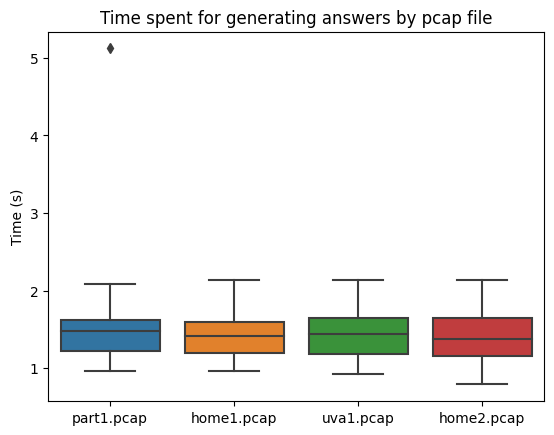

In [109]:
time_by_pcap(df3)

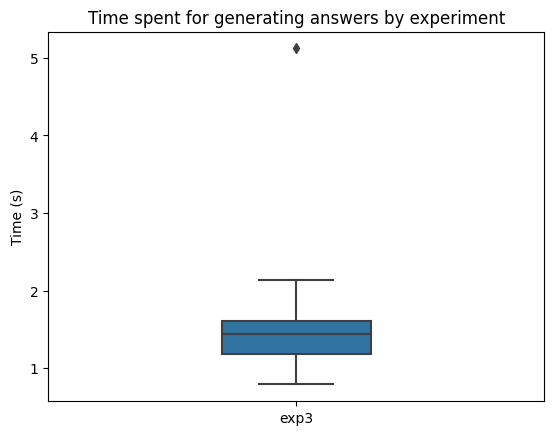

In [110]:
time_by_exp(df3)

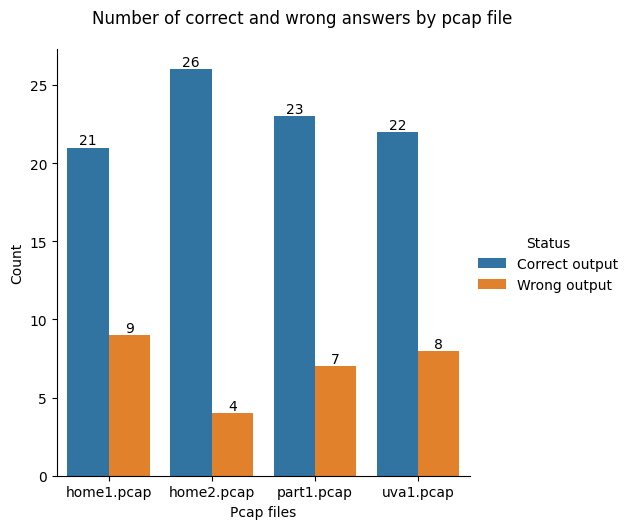

In [111]:
correct_answers_by_pcap(df3)

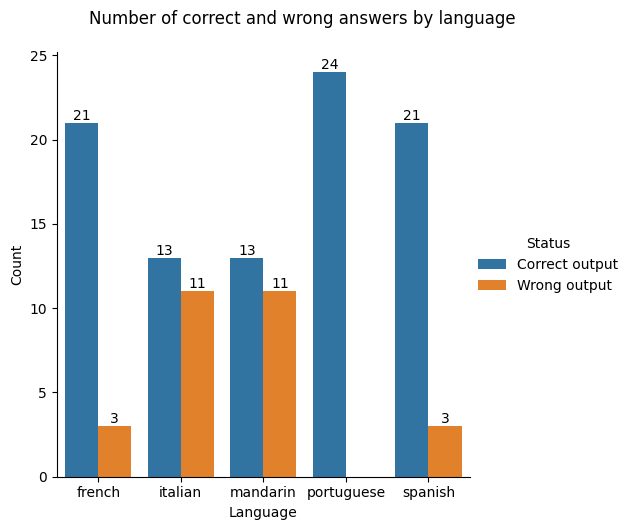

In [114]:
q_status = df3.groupby(['exp','language','status']).count().rename(columns={'time': 'count'}).reset_index()
barplot = sns.catplot(data=q_status, kind='bar', x='language', y='count', hue='status')
barplot.set_axis_labels('Language','Count');
barplot.legend.set_title('Status');
barplot.fig.suptitle('Number of correct and wrong answers by language', y=1.05);
for ax in barplot.axes.flat:
    for i in range(len(ax.containers)):
        ax.bar_label(ax.containers[i])


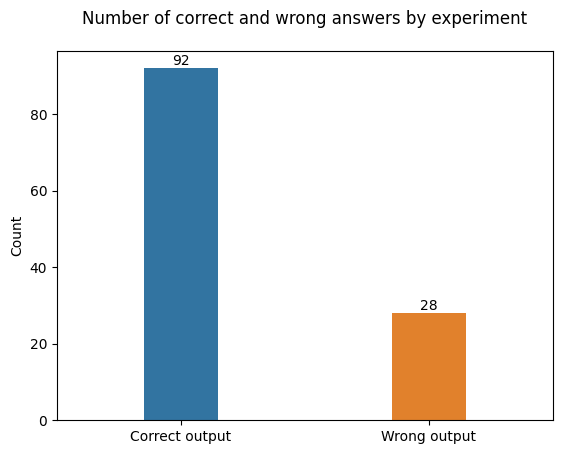

In [58]:
correct_answers_by_exp(df3)

In [59]:
get_stats(exp3, df3, 0)

Original query: What are the IPs that have shared the most number of TCP packets?
Modified query: 共享最多 TCP 数据包的 IP 是什么?
Original MySQL query:
	SELECT src_ip, dst_ip
	FROM (
		SELECT src_ip, dst_ip, COUNT(*) as C
		FROM pcap_data.packets
		WHERE protocol = "TCP"
		GROUP BY src_ip, dst_ip
		ORDER BY c DESC
	) aux
	LIMIT 1
GPT MySQL query:
	SELECT src_ip FROM packets WHERE protocol = 'TCP' GROUP BY src_ip ORDER BY COUNT(*) DESC LIMIT 1;
Ground truth output
+----+--------------+---------------+
|    | src_ip       | dst_ip        |
|----+--------------+---------------|
|  0 | 192.168.1.15 | 128.143.67.11 |
+----+--------------+---------------+
Approach output
+----+--------------+
|    | src_ip       |
|----+--------------|
|  0 | 192.168.1.15 |
+----+--------------+


## Experiment 4

In [68]:
# Load ./experiment/exp4.pkl
with open('./experiment/exp4.pkl', 'rb') as f:
    exp4 = pickle.load(f)

In [69]:
df4 = pd.DataFrame(columns=['exp', 'pcap_file', 'list_idx', 'group_id', 'adversarial_type', 'group_query',
                   'modified_query', 'original_query', 'gpt_query', 'time', 'status'])

for pcap_file, exp in exp4.items():
    for i, result in enumerate(exp):
        pred = "Correct output" if result['status'] else "Wrong output"
        original_query =  open(f"mysql_queries/q{result['group_id']+1}.sql", mode='r', encoding='utf-8-sig').read()
        row = [
            'exp4', pcap_file, i,
            result['group_id'],
            result['adversarial_type'],
            result['group_query'],
            result['modified_query'],
            original_query,
            result['gpt_query'],
            result['time'],
            pred]
        df4.loc[len(df4)] = row


In [70]:
df4

,exp,pcap_file,list_idx,group_id,adversarial_type,group_query,modified_query,original_query,gpt_query,time,status
0,exp4,part1.pcap,0,0,removeLetters,What is the IP address that has sent the most ...,What is the IP addess that has sent the most n...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,1.361633,Correct output
1,exp4,part1.pcap,1,0,removeLetters,What is the IP address that has sent the most ...,What is the IP addres that has sent the most u...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,2.000933,Correct output
2,exp4,part1.pcap,2,0,removeLetters,What is the IP address that has sent the most ...,What is the IP adress that has sent the most n...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,0.962375,Correct output
3,exp4,part1.pcap,3,0,removeLetters,What is the IP address that has sent the most ...,What is the IP adress that has sent the most n...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,1.101115,Correct output
4,exp4,part1.pcap,4,0,removeLetters,What is the IP address that has sent the most ...,What is the IP addres that has sent the most u...,"SELECT src_ip\nFROM (\n\tSELECT src_ip, COUNT(...",SELECT src_ip FROM packets WHERE protocol='TCP...,0.948926,Correct output
...,...,...,...,...,...,...,...,...,...,...,...
355,exp4,home2.pcap,85,5,neighborKeys,What is the most used protocol?,What is the most used profocol?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count \nFROM pack...",1.128313,Wrong output
356,exp4,home2.pcap,86,5,neighborKeys,What is the most used protocol?,What is the most used protocop?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count FROM packet...",0.730369,Wrong output
357,exp4,home2.pcap,87,5,neighborKeys,What is the most used protocol?,What is the most used protocok?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count \nFROM pack...",0.913657,Wrong output
358,exp4,home2.pcap,88,5,neighborKeys,What is the most used protocol?,What is the most used protodol?,"SELECT protocol\nFROM (\n SELECT protocol, ...","SELECT protocol, COUNT(*) AS count \nFROM pack...",0.937471,Wrong output


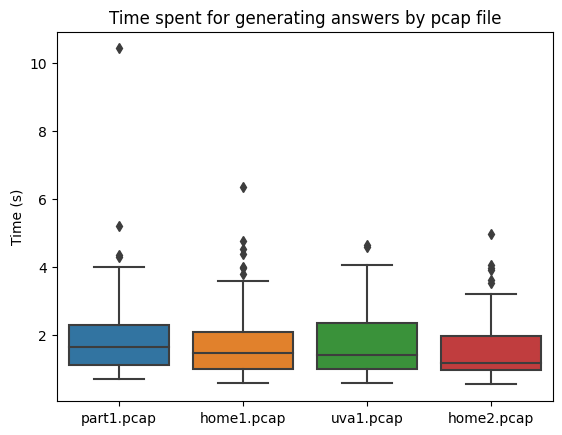

In [71]:
time_by_pcap(df4)

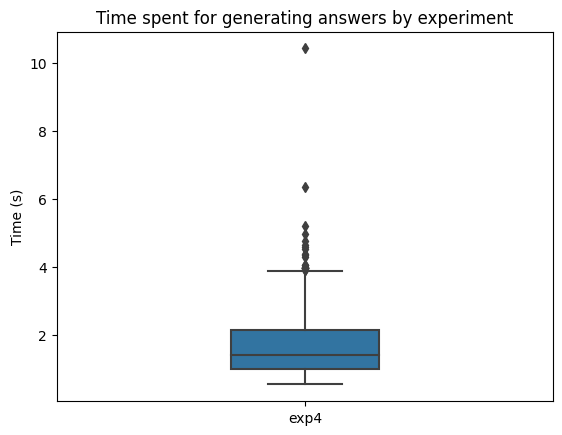

In [72]:
time_by_exp(df4)

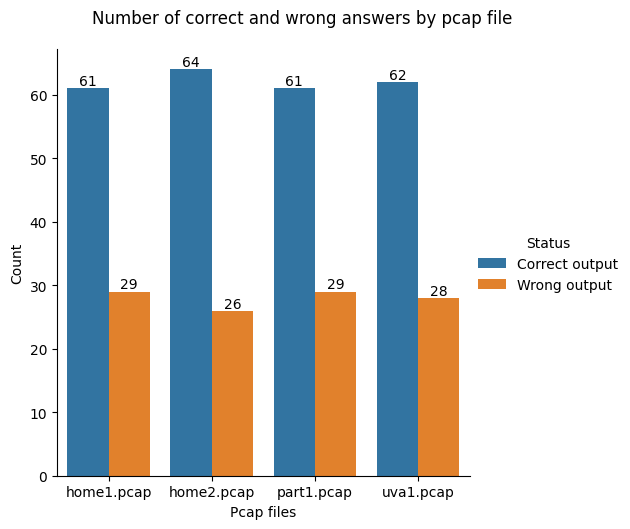

In [73]:
correct_answers_by_pcap(df4)

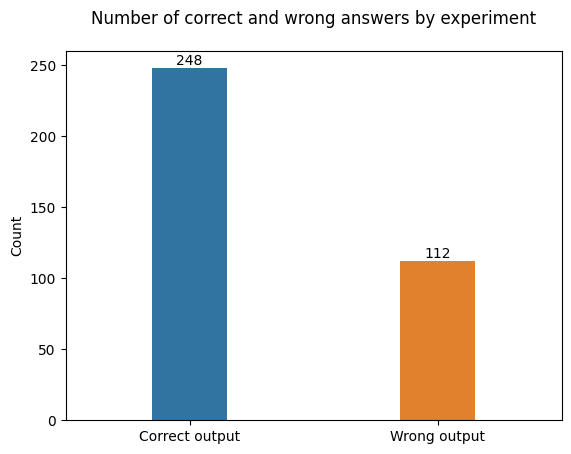

In [74]:
correct_answers_by_exp(df4)

In [75]:
get_stats(exp4, df4, 0)

Original query: What are the IPs that have shared the most number of TCP packets?
Modified query: What are the IPs that have hared the most numbe of TCP pacets?
Original MySQL query:
	SELECT src_ip, dst_ip
	FROM (
		SELECT src_ip, dst_ip, COUNT(*) as C
		FROM pcap_data.packets
		WHERE protocol = "TCP"
		GROUP BY src_ip, dst_ip
		ORDER BY c DESC
	) aux
	LIMIT 1
GPT MySQL query:
	SELECT src_ip, COUNT(*) AS num_packets
	FROM packets
	WHERE protocol = 'TCP'
	GROUP BY src_ip
	ORDER BY num_packets DESC
	LIMIT 1;
Ground truth output
+----+--------------+---------------+
|    | src_ip       | dst_ip        |
|----+--------------+---------------|
|  0 | 192.168.1.15 | 128.143.67.11 |
+----+--------------+---------------+
Approach output
+----+--------------+---------------+
|    | src_ip       |   num_packets |
|----+--------------+---------------|
|  0 | 192.168.1.15 |            32 |
+----+--------------+---------------+


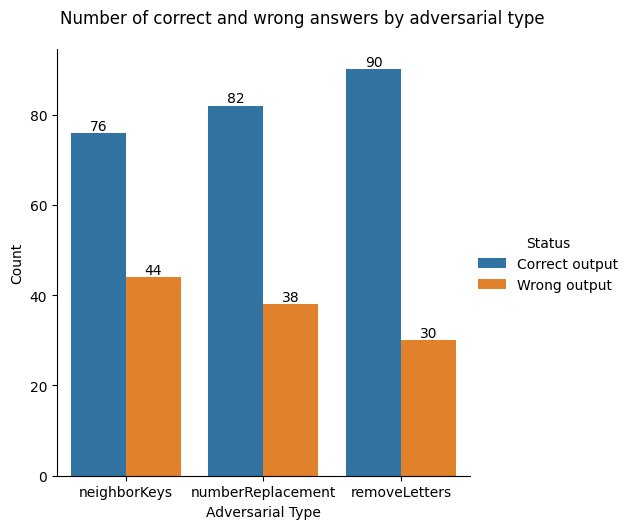

In [97]:
q_status = df4.groupby(['exp','adversarial_type','status']).count().rename(columns={'time': 'count'}).reset_index()
barplot = sns.catplot(data=q_status, kind='bar', x='adversarial_type', y='count', hue='status')
barplot.set_axis_labels('Adversarial Type','Count');
barplot.legend.set_title('Status');
barplot.fig.suptitle('Number of correct and wrong answers by adversarial type', y=1.05);
for ax in barplot.axes.flat:
    for i in range(len(ax.containers)):
        ax.bar_label(ax.containers[i])